In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
def load_data():
    data = yf.download(tickers='GBPBRL=X', period='max', interval='1d')
    return data

In [4]:
# Load data into the data-frame
data = load_data()

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2004-08-26 to 2024-07-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5134 non-null   float64
 1   High       5134 non-null   float64
 2   Low        5134 non-null   float64
 3   Close      5134 non-null   float64
 4   Adj Close  5134 non-null   float64
 5   Volume     5134 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.8 KB


In [6]:
df = data[data.index.year >= (pd.to_datetime("now").year-10)]
df = df.reset_index()
df = df[['Date','Close']]

In [7]:
df.columns = ['ds', 'y']
df

,ds,y
0,2014-01-01,3.903600
1,2014-01-02,3.905000
2,2014-01-03,3.918200
3,2014-01-06,3.892900
4,2014-01-07,3.892700
...,...,...
2736,2024-07-01,7.067138
2737,2024-07-02,7.150082
2738,2024-07-03,7.194245
2739,2024-07-04,7.081002


In [8]:
df

,ds,y
0,2014-01-01,3.903600
1,2014-01-02,3.905000
2,2014-01-03,3.918200
3,2014-01-06,3.892900
4,2014-01-07,3.892700
...,...,...
2736,2024-07-01,7.067138
2737,2024-07-02,7.150082
2738,2024-07-03,7.194245
2739,2024-07-04,7.081002


In [9]:
m = Prophet()
model = m.fit(df)

19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:41:45 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,3.881791,3.632824,4.098206,3.881791,3.881791,-0.007517,-0.007517,-0.007517,0.005972,0.005972,0.005972,-0.013489,-0.013489,-0.013489,0.0,0.0,0.0,3.874274
1,2014-01-02,3.880843,3.627305,4.105164,3.880843,3.880843,-0.009766,-0.009766,-0.009766,0.004417,0.004417,0.004417,-0.014183,-0.014183,-0.014183,0.0,0.0,0.0,3.871077
2,2014-01-03,3.879894,3.650051,4.103348,3.879894,3.879894,-0.007770,-0.007770,-0.007770,0.007097,0.007097,0.007097,-0.014867,-0.014867,-0.014867,0.0,0.0,0.0,3.872124
3,2014-01-06,3.877049,3.612380,4.101778,3.877049,3.877049,-0.017556,-0.017556,-0.017556,-0.000559,-0.000559,-0.000559,-0.016997,-0.016997,-0.016997,0.0,0.0,0.0,3.859493
4,2014-01-07,3.876100,3.624289,4.117560,3.876100,3.876100,-0.007450,-0.007450,-0.007450,0.010320,0.010320,0.010320,-0.017770,-0.017770,-0.017770,0.0,0.0,0.0,3.868650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2024-09-29,6.425176,6.142224,6.671162,6.336006,6.490271,-0.004112,-0.004112,-0.004112,-0.013623,-0.013623,-0.013623,0.009511,0.009511,0.009511,0.0,0.0,0.0,6.421064
2827,2024-09-30,6.425568,6.153322,6.706343,6.334281,6.491768,0.007013,0.007013,0.007013,-0.000559,-0.000559,-0.000559,0.007572,0.007572,0.007572,0.0,0.0,0.0,6.432581
2828,2024-10-01,6.425960,6.166195,6.723054,6.332759,6.494714,0.015824,0.015824,0.015824,0.010320,0.010320,0.010320,0.005504,0.005504,0.005504,0.0,0.0,0.0,6.441784
2829,2024-10-02,6.426352,6.185955,6.712351,6.330453,6.496593,0.009321,0.009321,0.009321,0.005972,0.005972,0.005972,0.003349,0.003349,0.003349,0.0,0.0,0.0,6.435673


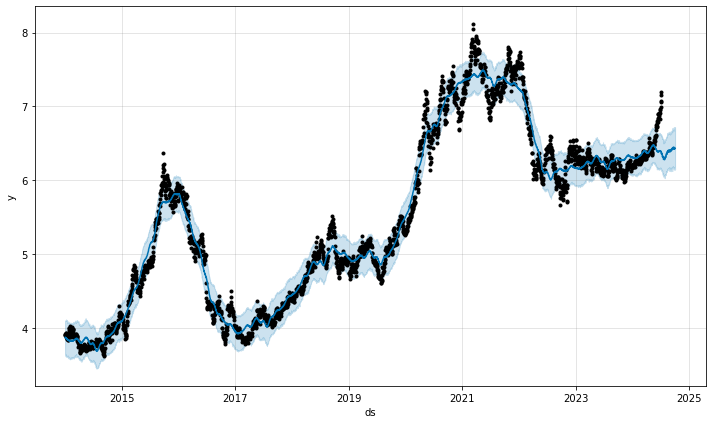

In [14]:
plot1 = m.plot(forecast)

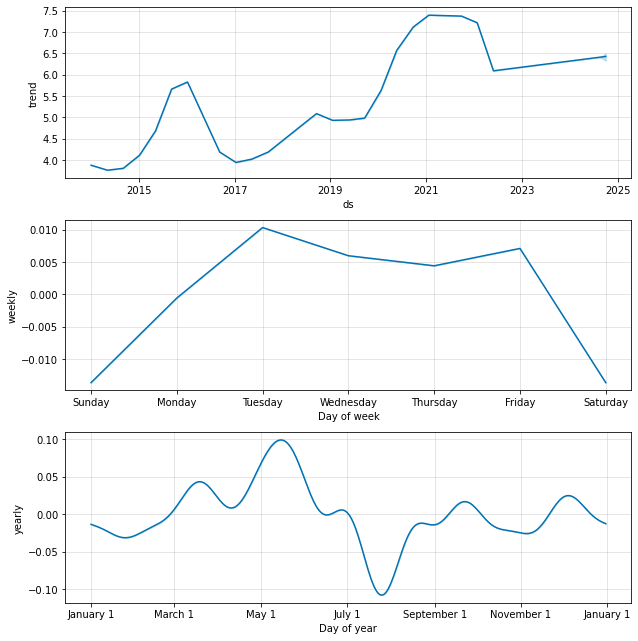

In [15]:
plot2 = m.plot_components(forecast)